In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
quant_features=[feature for feature in df.columns if df[feature].dtype!='O' and len(df[feature].unique())>10 ]
quant_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [6]:
qual_features=[feature for feature in df.columns if len(df[feature].unique())<10]
qual_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [7]:
for feature in qual_features:
    print(feature)
    print(df[feature].unique())

sex
[1 0]
cp
[3 2 1 0]
fbs
[1 0]
restecg
[0 1 2]
exang
[0 1]
slope
[0 2 1]
ca
[0 2 1 3 4]
thal
[1 2 3 0]
target
[1 0]


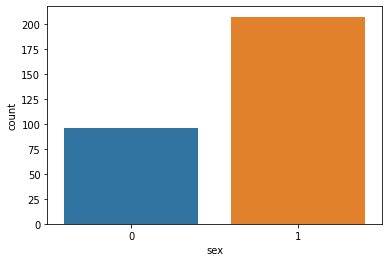

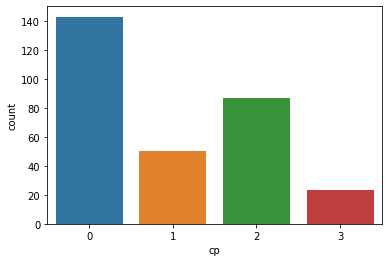

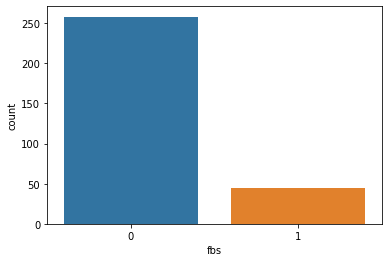

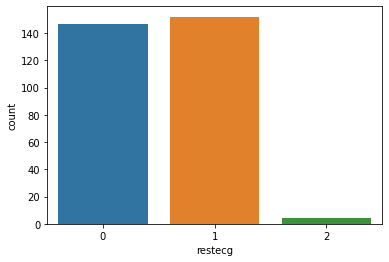

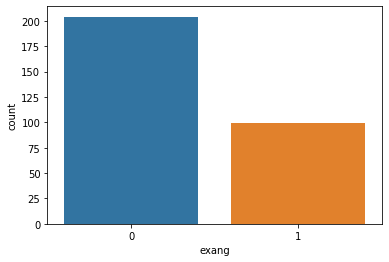

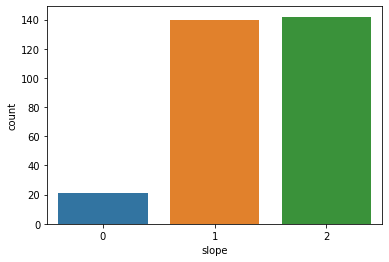

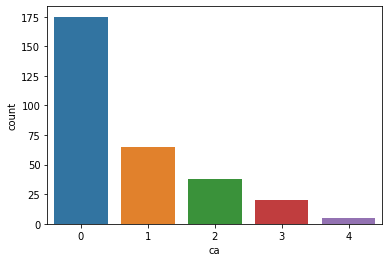

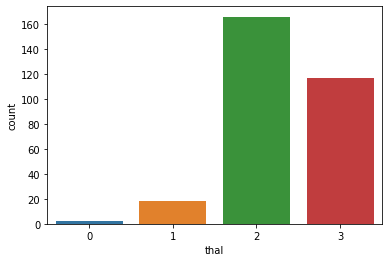

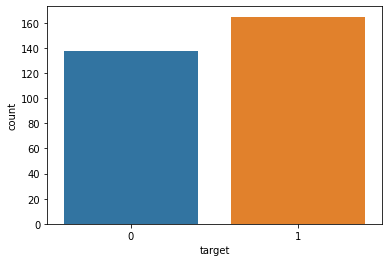

In [8]:
for feature in qual_features:
    sns.countplot(x=feature,data=df)
    plt.show()

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [10]:
len(numerical_features)

14

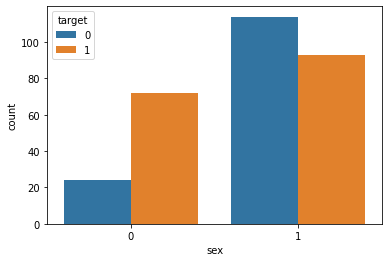

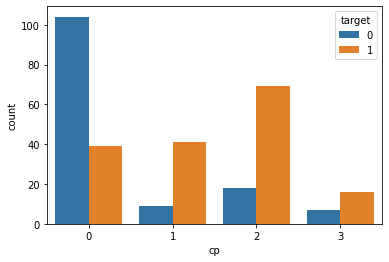

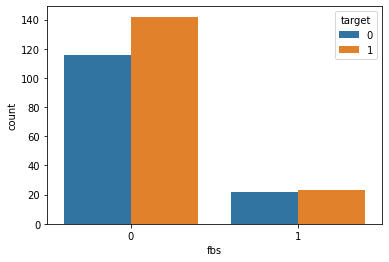

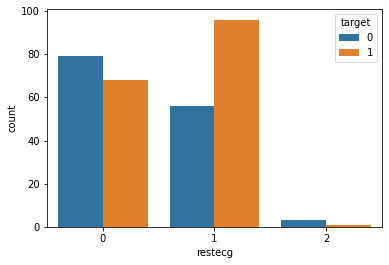

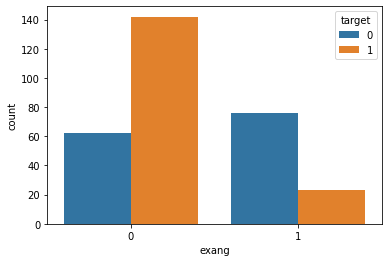

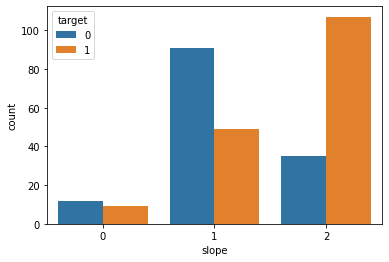

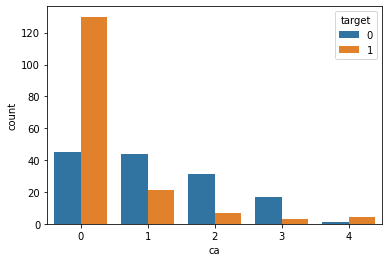

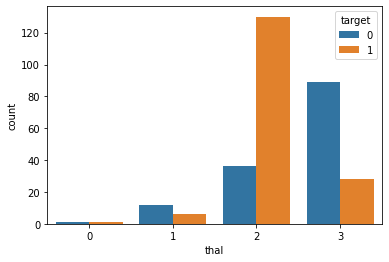

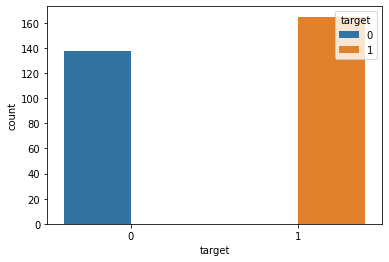

In [11]:
for feature in qual_features:
    sns.countplot(x=feature,hue='target',data=df)
    plt.show()

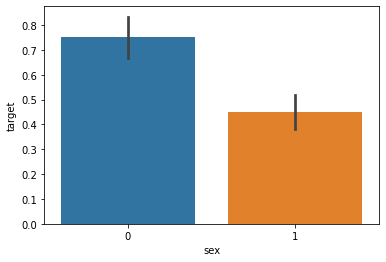

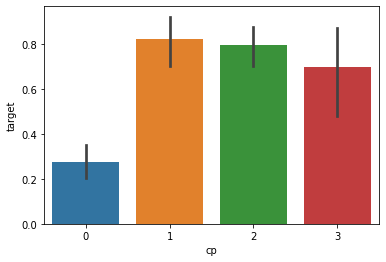

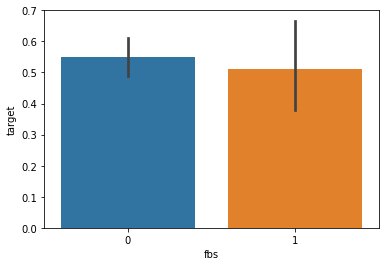

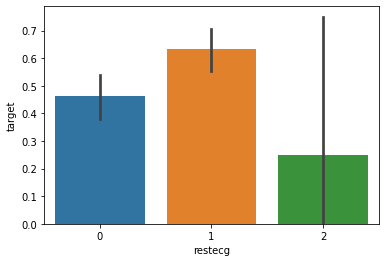

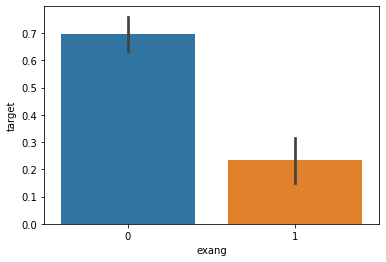

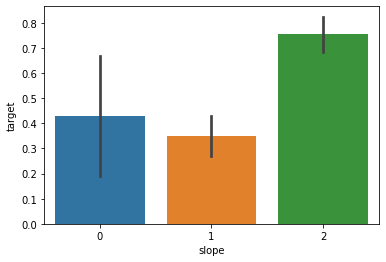

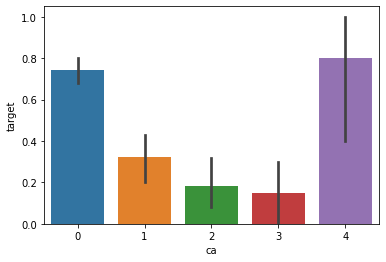

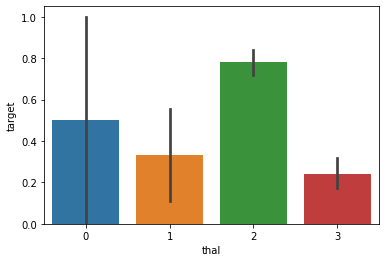

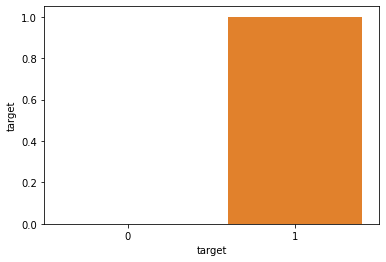

In [12]:
for feature in qual_features:
    sns.barplot(x=feature,y='target',data=df)
    plt.show()

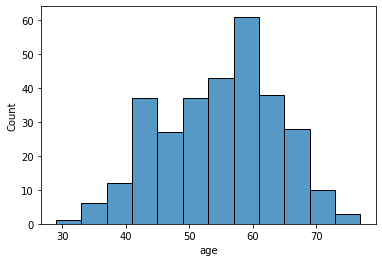

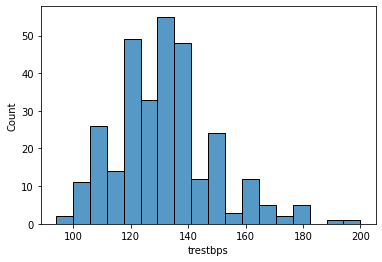

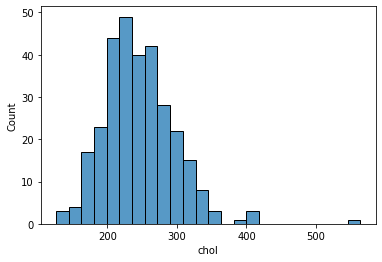

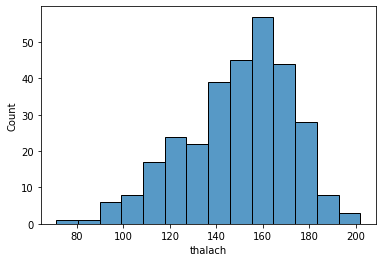

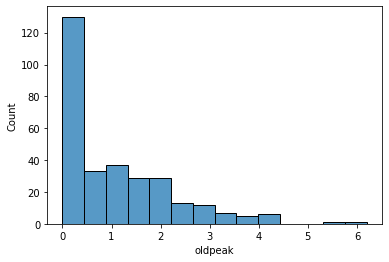

In [13]:
for feature in quant_features:
    sns.histplot(df[feature])
    plt.show()

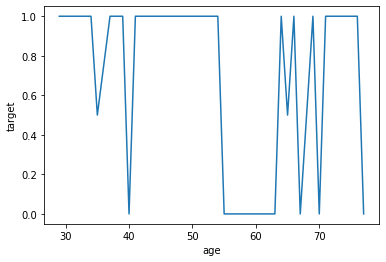

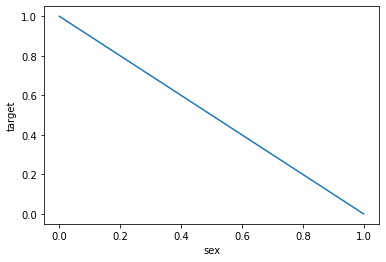

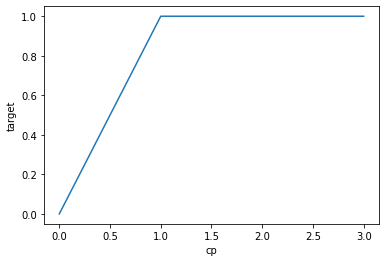

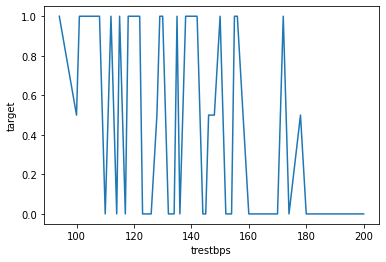

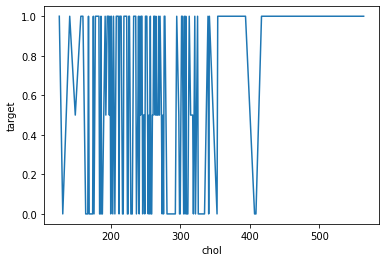

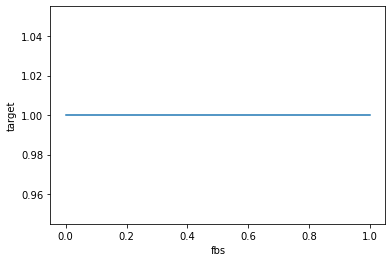

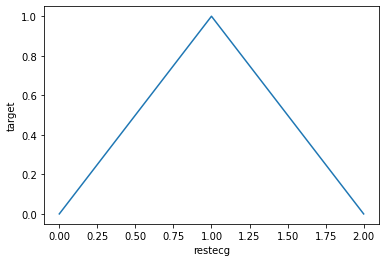

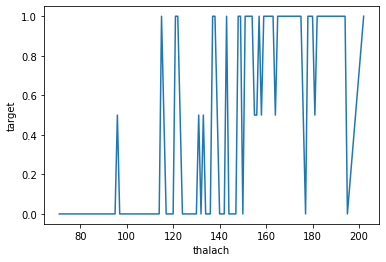

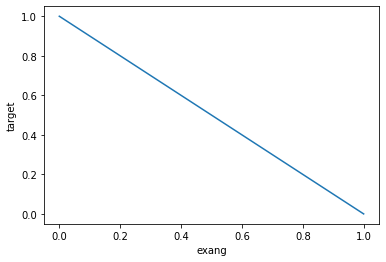

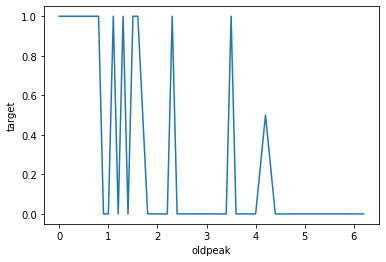

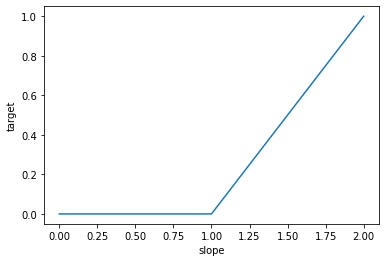

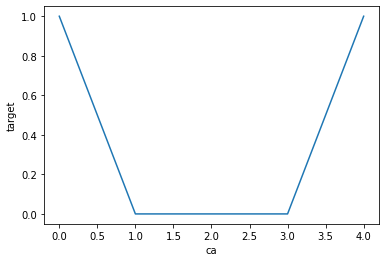

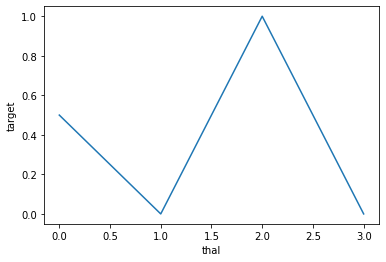

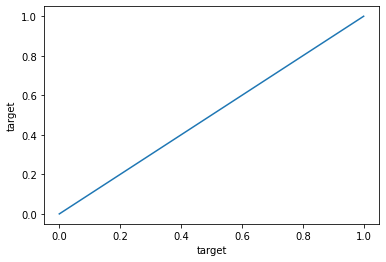

In [14]:
for feature in df.columns:
    df.groupby(feature)['target'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.show()
#     plt.title("House Price vs YearSold")

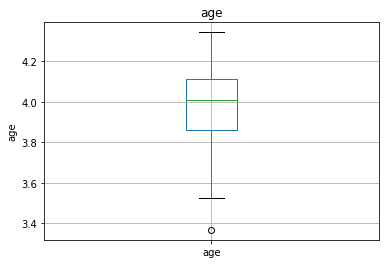

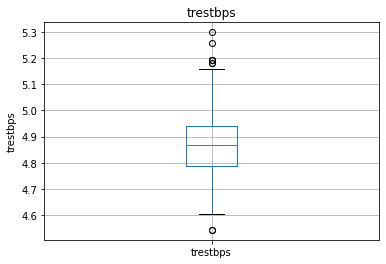

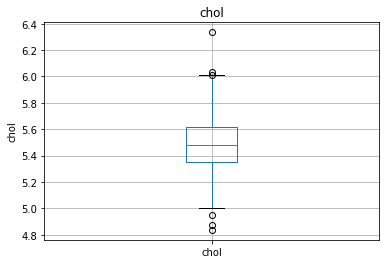

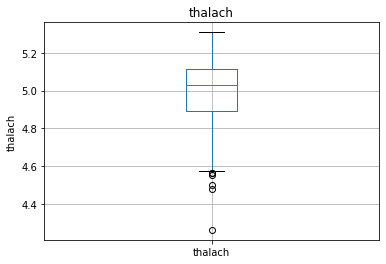

In [15]:
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

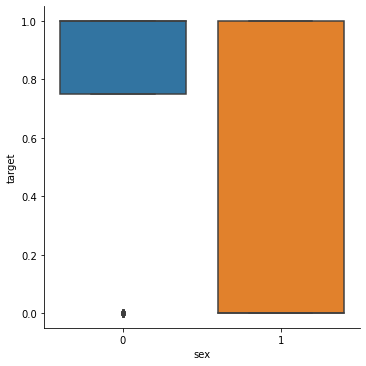

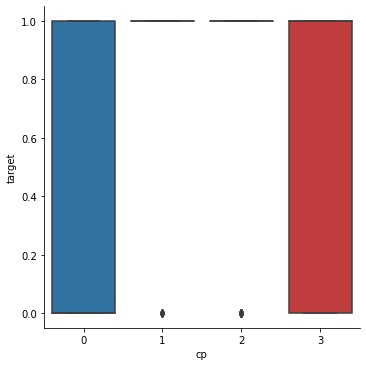

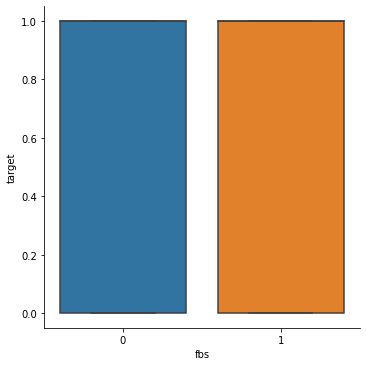

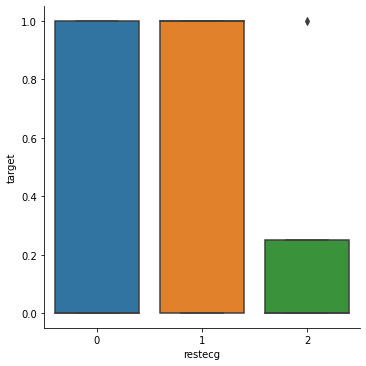

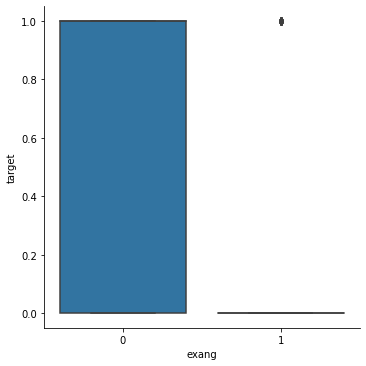

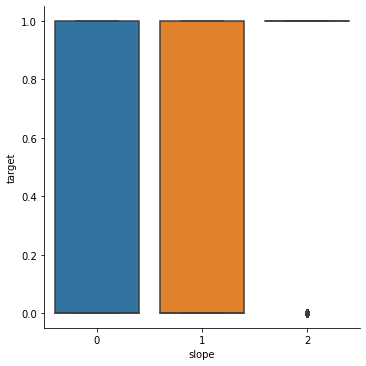

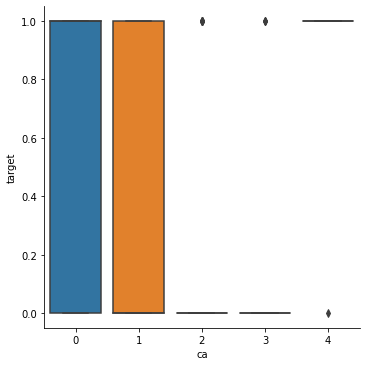

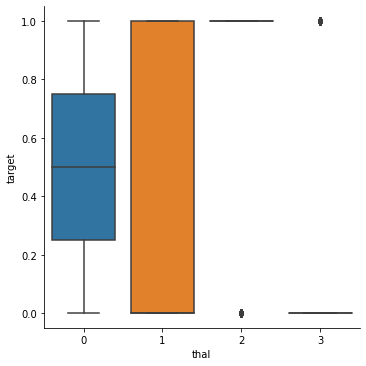

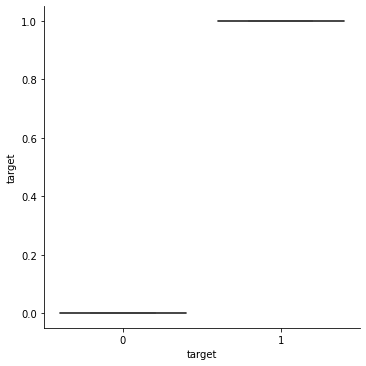

In [16]:
import seaborn as sns
for feature in qual_features:
    sns.catplot(x=feature,y='target',data=df,kind='box')


In [17]:
# for feature in df.columns:
#     data=df.copy()
#     data[feature]=np.log(data[feature])
#     data.boxplot(column=feature)
#     plt.ylabel(feature)
#     plt.title(feature)
#     plt.show()

In [59]:
# for feature in qual_features:
#     data=df.copy()
#     data.groupby(feature)['target'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('target')
#     plt.title(feature)
#     plt.show()

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


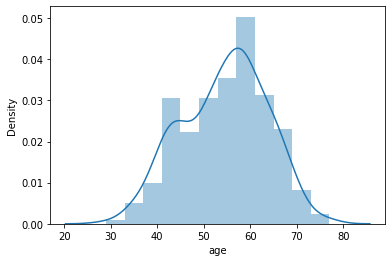

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


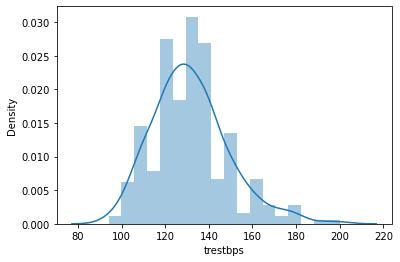

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


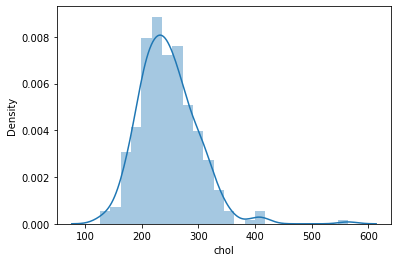

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


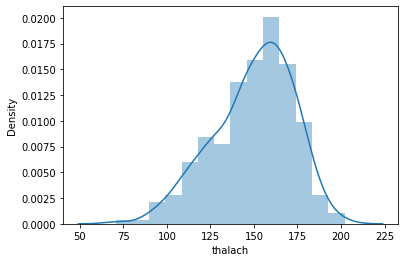

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


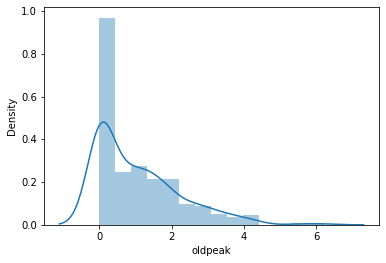

In [58]:
import seaborn as sns, numpy as np

for feature in quant_features:
    # sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
    ax = sns.distplot(df[feature])
    plt.show()

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
x=pd.pivot_table(df,index='target',values=quant_features)
x

,age,chol,oldpeak,thalach,trestbps
target,,,,,
0,56.601449,251.086957,1.585507,139.101449,134.398551
1,52.496970,242.230303,0.583030,158.466667,129.303030


In [21]:
c_matrix=df.corr()

In [24]:
c_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [61]:
# sns.relplot(x="age",y="target",data=df,kind='line')

In [34]:
strong_relation_features=[feature for feature in df.columns if abs(c_matrix['target'][feature])>0.3]
strong_relation_features

['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [35]:
strong_relation_features.remove('target')

In [36]:
strong_relation_features

['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [37]:
X=df[strong_relation_features]
y=df['target']

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [39]:
selection.feature_importances_

array([0.20645649, 0.18741348, 0.09903517, 0.12969611, 0.06679298,
       0.16595908, 0.14464669])

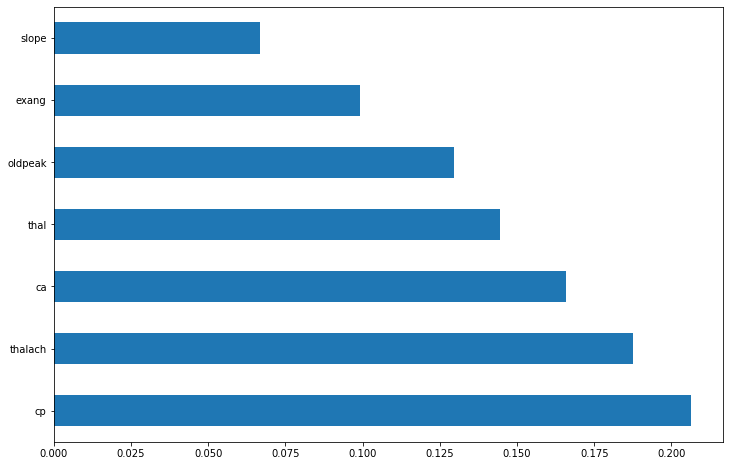

In [40]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [41]:
largest_imp_5=list(feat_importances.nlargest(5).keys())
largest_imp_5

['cp', 'thalach', 'ca', 'thal', 'oldpeak']

In [42]:
X.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

In [43]:
len(X.columns)

7

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring

Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.762473,0.838065,0.825269,0.703118


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [48]:
# As Random Forest and logistic regression perform at high accuracy so i choose one of them

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# from sklearn.svm import SVC
# model = SVC()

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [49]:
import pickle
pickle.dump(model, open('model_Heart_desease_prediction.pkl','wb'))

In [50]:
model.score(X_test,y_test)

0.8852459016393442

In [51]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [52]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1_score: 0.8923076923076922


In [53]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[25  4]
 [ 3 29]]


Text(69.0, 0.5, 'Truth')

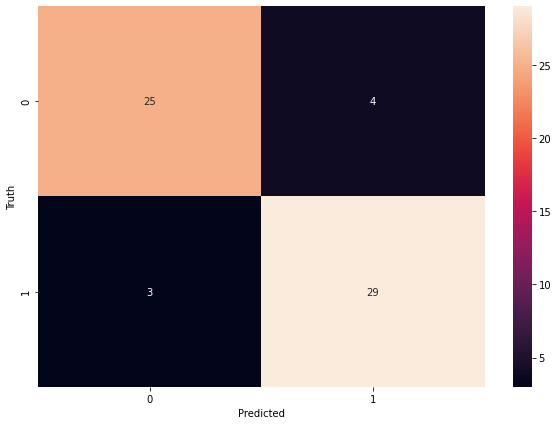

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

